In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\admin\Downloads\salary_data_file.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.describe()

,YearsExperience,Salary
count,128.000000,128.000000
mean,16.864062,91452.164062
std,8.228238,20287.637970
min,1.100000,37731.000000
25%,11.050000,78665.250000
50%,17.400000,93586.500000
75%,23.750000,107988.750000
max,30.100000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x240b75f5bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x240b760d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x240b75f5850>],
 'medians': [<matplotlib.lines.Line2D at 0x240b760d970>],
 'fliers': [<matplotlib.lines.Line2D at 0x240b760dcd0>],
 'means': []}

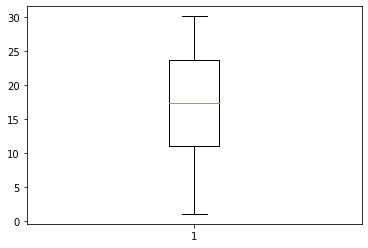

In [5]:
plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x240b76e5550>,
 'caps': [<matplotlib.lines.Line2D at 0x240b76e5c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x240b76e51f0>],
 'medians': [<matplotlib.lines.Line2D at 0x240b76f1310>],
 'fliers': [<matplotlib.lines.Line2D at 0x240b76f1670>],
 'means': []}

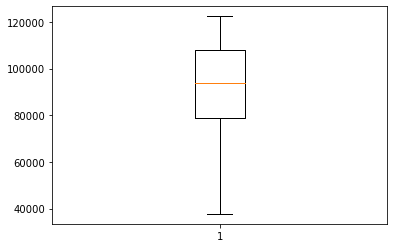

In [6]:
plt.boxplot(data['Salary'])

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.049948
Salary,0.049948,1.000000


<AxesSubplot:>

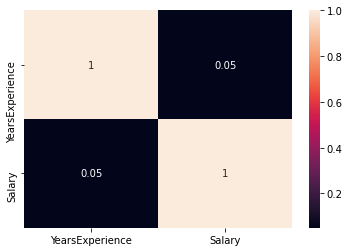

In [8]:
sns.heatmap(data.corr(),annot=True)

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
x = data.drop(['Salary'],axis=1)
y = data['Salary']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
a=(x.shape,x_train.shape,x_test.shape)
a

((128, 1), (89, 1), (39, 1))

In [13]:
from sklearn.preprocessing import StandardScaler
# for standardscaler mean is 0 and sd is 1
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [14]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.coef_

array([85.25555088])

In [17]:
#y = mx+c
model.intercept_

91874.97752808989

In [18]:

from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
print(r2_score(y_train,model.predict(x_train)))

1.8370259859623594e-05


In [20]:
print(r2_score(y_test,model.predict(x_test)))

-0.0031833315729776768


In [21]:
print(sqrt(r2_score(y_train,model.predict(x_train))))

0.004286054113006927


In [22]:
# R2 score ...> range(0-1) > if you get the value around 1 it gives you the high accuracy

### we can check our actual and predicted data

In [23]:
pd.DataFrame({'Actual':y_train,'Predicted':np.round(model.predict(x_train))})

,Actual,Predicted
22,101302,91778.0
44,114087,91837.0
65,103188,91881.0
95,87618,91944.0
30,121353,91807.0
...,...,...
106,81909,91967.0
14,61111,91742.0
92,89175,91937.0
51,110454,91851.0


In [24]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [25]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [26]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


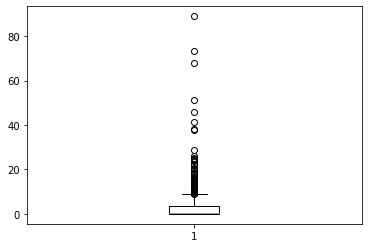

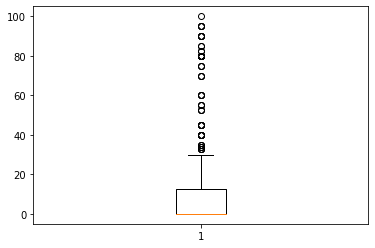

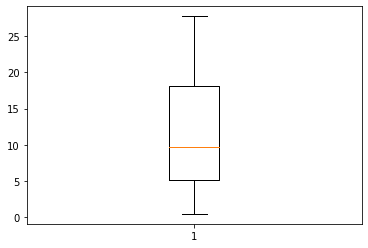

In [ ]:
for i in df:
    plt.boxplot(df[i])
    plt.show()

In [ ]:
for i in df:
    plt.boxplot(df[i])
    plt.show